# Non-deep learning method (PCA and LDA)

In [143]:
#import necessary packages
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import cv2
import math
from sklearn.neighbors import KNeighborsClassifier
#from PIL import Image
from sklearn import decomposition

In [106]:
#import data from cam_a train
folders = glob.glob('/Users/catherinexu/Documents/QUT/ML/Assignment1B/Data/Q1/VIPeR/Train/cam_a')
imagenames_list = []
classlabel_a_train=[]
for folder in folders:
    for f in glob.glob(folder+'/*.bmp'):
        imagenames_list.append(f)
cam_a = []        
for image in imagenames_list:
    cam_a.append(cv2.imread(image))
    # extract the filename froom the path
    filename = os.path.basename(image)
    # extract the first three digits from the filename
    # which ovvur before the underscore
    classlabel_a_train.append(np.int(filename.split('_')[0]))
cam_a_train = np.array(cam_a)

#import data from cam_b train
folders = glob.glob('/Users/catherinexu/Documents/QUT/ML/Assignment1B/Data/Q1/VIPeR/Train/cam_b')
imagenames_list = []
classlabel_b_train=[]
for folder in folders:
    for f in glob.glob(folder+'/*.bmp'):
        imagenames_list.append(f)
cam_b = []        
for image in imagenames_list:
    cam_b.append(cv2.imread(image))
    # extract the filename froom the path
    filename = os.path.basename(image)
    # extract the first three digits from the filename
    # which ovvur before the underscore
    classlabel_b_train.append(np.int(filename.split('_')[0]))
cam_b_train = np.array(cam_b)

#import data from cam_a test
folders = glob.glob('/Users/catherinexu/Documents/QUT/ML/Assignment1B/Data/Q1/VIPeR/Test/cam_a')
imagenames_list = []
classlabel_a_test=[]
for folder in folders:
    for f in glob.glob(folder+'/*.bmp'):
        imagenames_list.append(f)
cam_a = []        
for image in imagenames_list:
    cam_a.append(cv2.imread(image))
    # extract the filename froom the path
    filename = os.path.basename(image)
    # extract the first three digits from the filename
    # which ovvur before the underscore
    classlabel_a_test.append(np.int(filename.split('_')[0]))
cam_a_test = np.array(cam_a)

#import data from cam_b test
folders = glob.glob('/Users/catherinexu/Documents/QUT/ML/Assignment1B/Data/Q1/VIPeR/Test/cam_b')
imagenames_list = []
classlabel_b_test=[]
for folder in folders:
    for f in glob.glob(folder+'/*.bmp'):
        imagenames_list.append(f)
cam_b = []        
for image in imagenames_list:
    cam_b.append(cv2.imread(image))
    # extract the filename froom the path
    filename = os.path.basename(image)
    # extract the first three digits from the filename
    # which ovvur before the underscore
    classlabel_b_test.append(np.int(filename.split('_')[0]))
cam_b_test = np.array(cam_b)

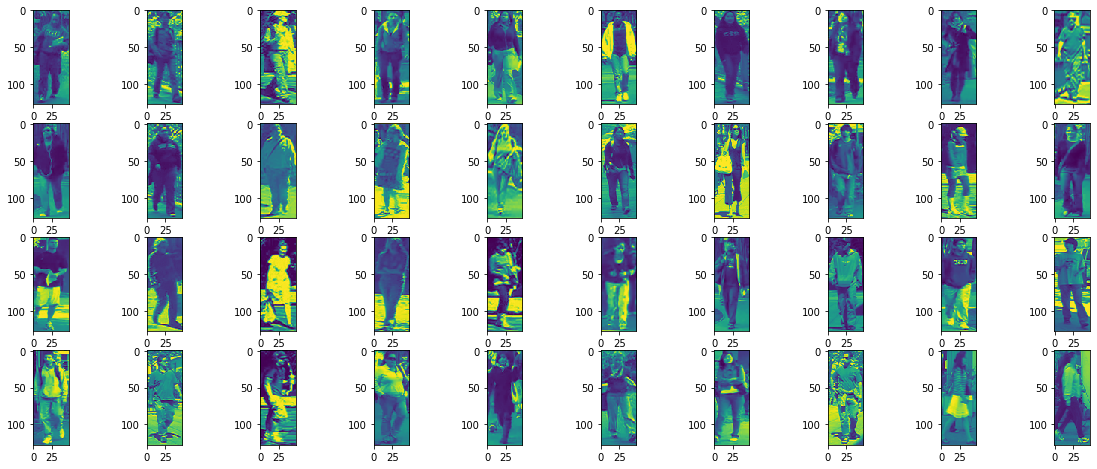

In [6]:
#Study the first 40 photos
fig = plt.figure(figsize=[20, 8])
for i in range(40):
    ax = fig.add_subplot(4, 10, i + 1)
    ax.imshow(X_train[i,:,:])

In [113]:
#Reshape cam_a data into a vector, rename the vector
cam_a_trainv = np.reshape(cam_a_train, (482, 128*48*3))
cam_a_testv = np.reshape(cam_a_test, (150, 128*48*3))
print(len(cam_a_trainv))
print(len(cam_a_testv))
#Reshape cam_b data into a vector, rename the vector
cam_b_trainv = np.reshape(cam_b_train, (482, 128*48*3))
cam_b_testv = np.reshape(cam_b_test, (150, 128*48*3))

482
150


In [148]:
#Concatenate class labels besed on training and testing
class_label_train = np.concatenate((classlabel_a_train, classlabel_b_train))
class_label_test = np.concatenate((classlabel_a_test, classlabel_b_test))
#Concatenate training arrays
train_data = np.concatenate((cam_a_trainv, cam_b_trainv))
#Concatenate testing arrays
test_data = np.concatenate((cam_a_testv, cam_b_testv))
print(len(training))
print(len(testing))

964
300


In [138]:
#Fit pca to train_data which is a concat of training cam_a and cam_b
pca = decomposition.PCA()
pca.fit(train_data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [139]:
#transform data and look at variation. We see that the first dimension contains most of the information
transformed = pca.transform(train_data)
print(pca.explained_variance_ratio_)

[1.63107684e-01 9.70410592e-02 7.13471347e-02 3.63820346e-02
 2.71306114e-02 2.62265988e-02 2.25144435e-02 1.83113945e-02
 1.56887531e-02 1.39360936e-02 1.31858780e-02 1.21798338e-02
 1.06890280e-02 1.03394324e-02 8.78706999e-03 8.39973412e-03
 8.07925569e-03 7.80239776e-03 7.60781308e-03 7.22332840e-03
 6.92946332e-03 6.57244071e-03 5.77337447e-03 5.68423351e-03
 5.58105423e-03 5.44701107e-03 5.33425068e-03 4.99189124e-03
 4.87273033e-03 4.78868837e-03 4.57276528e-03 4.56717470e-03
 4.30634664e-03 4.17717886e-03 3.97577364e-03 3.94041932e-03
 3.82954439e-03 3.55780426e-03 3.51083050e-03 3.35488631e-03
 3.34566395e-03 3.23598846e-03 3.17001663e-03 3.06273449e-03
 3.02961909e-03 2.89942072e-03 2.81969481e-03 2.78089493e-03
 2.74695452e-03 2.65447075e-03 2.59995986e-03 2.52606208e-03
 2.45898308e-03 2.43112712e-03 2.36274731e-03 2.34838173e-03
 2.30140504e-03 2.28416502e-03 2.21667591e-03 2.15137823e-03
 2.12749907e-03 2.09943957e-03 2.08447171e-03 2.04556845e-03
 1.96790240e-03 1.953368

In [140]:
#First pca component contains 16% of the variance, we want 95, take the cumulative sum
cumulative_sum = np.cumsum(pca.explained_variance_ratio_, axis=0)
top95 = np.where(cumulative_sum > 0.95)[0][0]
#Get an array which give us 95% of the variance explained
transformed_train_95 = transformed[:, 0:top95]
print(top95)
print(len(pca.explained_variance_ratio_))
print(len(transformed))
print(len(transformed_train_95))

402
964
964
964


In [141]:
transformed_train = transformed
transformed_test = pca.transform(test_data)
#Use the transformed data such that we get 99 components
transformed_train_95 = transformed_train[:, 0:top95]
transformed_test_95 = transformed_test[:, 0:top95]

In [142]:
pca_coeff_for_lda = 1024 - len(np.unique(train_data))

#ACTUALLY USE THE TOP95?
transformed_train_for_lda = transformed_train_95[:, 0:pca_coeff_for_lda]
transformed_test_for_lda = transformed_test_95[:, 0:pca_coeff_for_lda]

In [191]:
#Fit lda model on cam_a and b together by using the concatenated arrays

lda = discriminant_analysis.LinearDiscriminantAnalysis()
lda.fit(np.array(transformed_train_for_lda), class_label_train)
transformed_train = lda.transform(transformed_train_for_lda)
print(np.shape(transformed_train))
transformed_test = lda.transform(transformed_test_for_lda)
print(np.shape(transformed_test))

#define the embeddings for all four
embedding_a_train = transformed_train[:482]
embedding_b_train = transformed_train[482:]
embedding_a_test = transformed_test[:150]
embedding_b_test = transformed_test[150:]

print(len(embedding_a_train))
print(len(embedding_b_train))
print(len(embedding_a_test))
print(len(embedding_b_test))

(964, 402)
(300, 402)
482
482
150
150


In [192]:
#Concatenate class labels based on cam_a and cam_b, length of all these concats are 632
classlabel_a = np.concatenate((classlabel_a_train, classlabel_a_test))
classlabel_b = np.concatenate((classlabel_b_train, classlabel_b_test))
#Concatenate embeddings based on cam_a and cam_b, length of all these concats are 632
embedding_a = np.concatenate((embedding_a_train, embedding_a_test))
embedding_b = np.concatenate((embedding_b_train, embedding_b_test))
#Combine classlabel and embedding for a and b such that we get an array for a on the form 
#[[classlabel1, embedding1], [classlabel2, embedding2], [classlabel3, embedding3],...]
#name the cam_a array for gallery
#name the cam_B array for querys
querys = []
gallery = []

for i in range (len(classlabel_a)):
    entry_b = [classlabel_b[i], embedding_b[i]]
    querys.append(entry_b)
    entry_a = [classlabel_a[i], embedding_a[i]]
    gallery.append(entry_a)

In [193]:
#From https://stackoverflow.com/questions/56946252/how-to-get-the-right-results-for-cumulative-match-characteristic-cmc-curve
# Gallery is a array[classlabel_a, embedding_a]
# query is a array[classlabel_b, embedding_b]
#From noe on embedding = feature and classlabel = filename
def cmc(querys, gallery, topk):
    ret = np.zeros(topk)
    valid_queries = 0
    all_rank = []
    sum_rank = np.zeros(topk)
    for query in querys:
        q_id = query[0]
        q_feature = query[1]
        # Calculate the distances for each query
        distmat = []
        for entry in gallery: #two entries, one is classlabel/filename array and the other one embedding/feature array
            # Get the label from the image
            name = entry[0]
            feature = entry[1]
            dist = np.linalg.norm(q_feature - feature)
            distmat.append([name, dist])
        # sort based on the distance index from the distmat results,
        # which is stored in the first index
        distmat.sort(key=lambda dist:dist[1])
        # Find matches
        matches = np.zeros(len(distmat))
        # Zero if no match 1 if match
        for i in range(0, len(distmat)):
            if distmat[i][0] == q_id:
                # Match found
                matches[i] = 1
        rank = np.zeros(topk)
        for i in range(0, topk):
            if matches[i] == 1:
                rank[i] = 1
                # If 1 is found then break as you dont need to look further path k
                break
        all_rank.append(rank)
        valid_queries +=1
    #print(all_rank)
    sum_all_ranks = np.zeros(len(all_rank[0]))
    for i in range(0,len(all_rank)):
        my_array = all_rank[i]
        for g in range(0, len(my_array)):
            sum_all_ranks[g] = sum_all_ranks[g] + my_array[g]
    sum_all_ranks = np.array(sum_all_ranks)
    print("NPSAR", sum_all_ranks)
    cmc_results = np.cumsum(sum_all_ranks) / valid_queries
    print(cmc_results)
    return cmc_results

In [190]:
cmc(querys, gallery, 5)

NPSAR [482.   4.   2.   2.   2.]
[0.76265823 0.76898734 0.7721519  0.77531646 0.77848101]


array([0.76265823, 0.76898734, 0.7721519 , 0.77531646, 0.77848101])

In [7]:
#Reshape vector back to image before we visualize

#X_trainv_reshape = np.reshape(X_trainv, (len(X_train),128,48))

#fig = plt.figure(figsize=[20, 8])
#for i in range(40):
#    ax = fig.add_subplot(4, 10, i + 1)
#    ax.imshow(X_trainv_reshape[i,:,:])


256


# Deel Learning - Siamese Network

In [ ]:
#Reshaping our images, smaller size
cam_B_train = np.zeros([len(cam_b_train),64,24,3],dtype='float32')
idx=0

for pic in cam_b_train:
    pic = np.array(pic,dtype=np.float32)
    pic = cv2.resize(pic,(24,64))
    cam_B_train[idx] = pic
    idx=idx+1
    
cam_A_train = np.zeros([len(cam_a_train),64,24,3],dtype='float32')
idx=0
for pic in cam_a_train:
    pic = np.array(pic,dtype=np.float32)
    pic = cv2.resize(pic,(24,64))
    cam_A_train[idx] = pic
    idx=idx+1

cam_B_test = np.zeros([len(cam_b_test),64,24,3],dtype='float32')
idx=0
for pic in cam_b_test:
    pic = np.array(pic,dtype=np.float32)
    pic = cv2.resize(pic,(24,64))
    cam_B_test[idx] = pic
    idx=idx+1

cam_A_test = np.zeros([len(cam_a_test),64,24,3],dtype='float32')
idx=0
for pic in cam_a_test:
    pic = np.array(pic,dtype=np.float32)
    pic = cv2.resize(pic,(24,64))
    cam_A_train[idx] = pic
    idx=idx+1

In [ ]:
#Concatenate class labels besed on training and testing
class_label_train = np.concatenate((classlabel_a_train,
classlabel_b_train))
class_label_test = np.concatenate((classlabel_a_test,
classlabel_b_test))
#Concatenate training arrays
train_data = np.concatenate((cam_A_train, cam_B_train))
#Concatenate testing arrays
test_data = np.concatenate((cam_A_test, cam_B_test))
#Reshape into one shape dimension
class_label_test = np.reshape(class_label_test, -1)
class_label_train = np.reshape(class_label_train, -1)
#train_data = train_data/255
#test_data = test_data/255
#print(test_data.shape)
#print(train_data.shape)
#print(class_label_test.shape)
#print(class_label_train.shape)

In [ ]:
#get number of pairs, and for each pair generate a nuimber stating
if the two images are the same
#or different pairs
#Code from here on is heavily borrowed from Week 7 tutorial
def GetSiameseData(imgs, labels, batch_size):
    image_a = np.zeros((batch_size, np.shape(imgs)[1],
np.shape(imgs)[2], np.shape(imgs)[3]));
    image_b = np.zeros((batch_size, np.shape(imgs)[1],
np.shape(imgs)[2], np.shape(imgs)[3]));
    label = np.zeros(batch_size);
      
    for i in range(batch_size):
        if (i % 2 == 0):
            idx1 = random.randint(0, len(imgs) - 1)
            idx2 = random.randint(0, len(imgs) - 1)
            l = 1
            while (labels[idx1] != labels[idx2]):
                idx2 = random.randint(0, len(imgs) - 1)
        else:
            idx1 = random.randint(0, len(imgs) - 1)
            idx2 = random.randint(0, len(imgs) - 1)
            l = 0
            while (labels[idx1] == labels[idx2]):
                idx2 = random.randint(0, len(imgs) - 1)
        image_a[i, :, :, :] = imgs[idx1,:,:,:]
        image_b[i, :, :, :] = imgs[idx2,:,:,:]
        label[i] = l
    return [image_a, image_b], label

In [ ]:
#Find triplets, one anchor, one positive and one negative
def GetTripletData(imgs, labels, batch_size):
    image_a = np.zeros((batch_size, np.shape(imgs)[1],
np.shape(imgs)[2], np.shape(imgs)[3]));
    image_b = np.zeros((batch_size, np.shape(imgs)[1],
np.shape(imgs)[2], np.shape(imgs)[3]));
    image_c = np.zeros((batch_size, np.shape(imgs)[1],
np.shape(imgs)[2], np.shape(imgs)[3]));
    
    for i in range(batch_size):
        idx1 = random.randint(0, len(imgs) - 1)
        idx2 = random.randint(0, len(imgs) - 1)
        idx3 = random.randint(0, len(imgs) - 1)
        while (labels[idx1] != labels[idx2]):
            idx2 = random.randint(0, len(imgs) - 1)
        while (labels[idx1] == labels[idx3]):
            idx3 = random.randint(0, len(imgs) - 1)
            image_a[i, :, :, :] = imgs[idx1,:,:,:]
        image_b[i, :, :, :] = imgs[idx2,:,:,:]
        image_c[i, :, :, :] = imgs[idx3,:,:,:]
    return [image_a, image_b, image_c]

In [ ]:
#Generate the triplets
def TripleGenerator(imgs, labels, batch_size):
    while True:
    [image_a, image_b, image_c] = GetTripletData(imgs, labels,
batch_size)
    yield [image_a, image_b, image_c], None

test = TripleGenerator(train_data, class_label_train, 9)
x, _ = next(test)

fig = plt.figure(figsize=[25, 10])
    for i in range(9):
        ax = fig.add_subplot(3, 9, i*3 + 1)
        ax.imshow(x[0][i,:,:,0])
        ax.set_title('Triple ' + str(i) + ': Anchor')

ax = fig.add_subplot(3, 9, i*3 + 2)
ax.imshow(x[1][i,:,:,0])
ax.set_title('Triple ' + str(i) + ': Positive')

ax = fig.add_subplot(3, 9, i*3 + 3)
ax.imshow(x[2][i,:,:,0])
ax.set_title('Triple ' + str(i) + ': Negative')

In [ ]:
#We have stardard network, but it will learn a desne feature - our
#embeddings
#All embeddings are from the same network, and we wish one for two
#images
#idea: if we pass two of the same images throug, we get the same
#embedding for both
#two similar imaged passing through -> two similar embeddings

def conv_block(inputs, filters, spatial_dropout = 0.0, max_pool =
True):
    x = layers.Conv2D(filters=filters, kernel_size=(3,3),
padding='same', activation='relu')(inputs)
    x = layers.Conv2D(filters=filters, kernel_size=(3,3),
padding='same', activation=None)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    if (spatial_dropout > 0.0):
        x = layers.SpatialDropout2D(spatial_dropout)(x)
    if (max_pool == True):
        x = layers.MaxPool2D(pool_size=(2, 2))(x)
    return x

def fc_block(inputs, size, dropout):
    x = layers.Dense(size, activation=None)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    if (dropout > 0.0):
        x = layers.Dropout(dropout)(x)
    return x

def vgg_net(inputs, filters, fc, spatial_dropout = 0.0, dropout =
0.0):
    x = inputs
    for idx,i in enumerate(filters):
        x = conv_block(x, i, spatial_dropout, not (idx==len(filters)- 1))
    x = layers.Flatten()(x)
    for i in fc:
        x = fc_block(x, i, dropout)
    return x

In [ ]:
#Now we create input, create network with desired parameters, add embedding layers
#this is turned into a model
embedding_size = 16
dummy_input = keras.Input((64, 24, 3))
base_network = vgg_net(dummy_input, [8, 16, 32], [256], 0.2, 0)
embedding_layer = layers.Dense(embedding_size, activation=None)
(base_network)
base_network = keras.Model(dummy_input, embedding_layer,
name='SiameseBranch')

In [ ]:
# create loss layer
class TripletLossLayer(layers.Layer):
    def __init__(self, alpha, **kwargs):
    self.alpha = alpha
    super(TripletLossLayer, self).__init__(**kwargs)
    
    def triplet_loss(self, inputs):
        anchor, positive, negative = inputs
        anchor = K.l2_normalize(anchor, axis=1)
        positive = K.l2_normalize(positive, axis=1)
        negative = K.l2_normalize(negative, axis=1)
        p_dist = K.sum(K.square(anchor-positive), axis=-1)
        n_dist = K.sum(K.square(anchor-negative), axis=-1)
        return K.sum(K.maximum(p_dist - n_dist + self.alpha, 0), axis=0)
    
    def call(self, inputs):
        loss = self.triplet_loss(inputs)
        self.add_loss(loss)
        return loss

In [ ]:
input_anchor = keras.Input((64, 24, 3), name='Anchor')
input_positive = keras.Input((64, 24, 3), name='Positive')
input_negative = keras.Input((64, 24, 3), name='Negative')
embedding_anchor = base_network(input_anchor)
embedding_positive = base_network(input_positive)
embedding_negative = base_network(input_negative)
margin = 1
loss_layer = TripletLossLayer(alpha=margin,
name='triplet_loss_layer')([embedding_anchor, embedding_positive,
embedding_negative])

In [ ]:
#As the inputs are triplets and we simply seek to minimise a
distance between the triplets, we don't need a label.
triplet_network = keras.Model(inputs=[input_anchor, input_positive,
input_negative], outputs=loss_layer)
triplet_network.summary()

triplet_network.compile(optimizer=keras.optimizers.RMSprop())
batch_size = 64
training_gen = TripleGenerator(train_data, class_label_train,
batch_size)
triplet_test_x = GetTripletData(test_data, class_label_test, 1000)

triplet_network.fit(training_gen, steps_per_epoch = 600 // batch_size, epochs=20, validation_data=(triplet_test_x, None))


In [ ]:
#Look at scatter plot
#remember we have a simple network, small embedding, it hasn't been
trained for that long
#d_embeddings = base_network.predict(train_data)
d_embeddings = base_network.predict(train_data)
tsne_embeddings = TSNE(random_state=4).fit_transform(d_embeddings)
fig = plt.figure(figsize=[12, 12])
ax = fig.add_subplot(1, 1, 1)
ax.scatter(tsne_embeddings[:,0], tsne_embeddings[:,1], c =
class_label_train.flatten());

In [ ]:
d_test_embeddings = base_network.predict(test_data)

d_embedding_a_train = d_embeddings[:482]
d_embedding_b_train = d_embeddings[482:]
d_embedding_a_test = d_test_embeddings[:150]
d_embedding_b_test = d_test_embeddings[150:]

#d_embedding_a_train = d_embedding_a_train/255
#d_embedding_b_train = d_embedding_b_train/255
#d_embedding_a_test = d_embedding_a_test/255
#d_embedding_b_test = d_embedding_b_test/255

In [ ]:
#Create the input arrays for
dquerys_train = []
dgallery_train = []
for i in range (len(classlabel_a_train)):
    entry_b = [classlabel_b_train[i], d_embedding_b_train[i]]
    dquerys_train.append(entry_b)
    entry_a = [classlabel_a_train[i], d_embedding_a_train[i]]
    dgallery_train.append(entry_a)
    
dquerys_test = []
dgallery_test = []

for i in range (len(classlabel_a_test)):
    entry_b = [classlabel_b_test[i], d_embedding_b_test[i]]
    dquerys_test.append(entry_b)
    entry_a = [classlabel_a_test[i], d_embedding_a_test[i]]
    dgallery_test.append(entry_a)

In [ ]:
#Deep network
top1_dtest=cmc(dquerys_test, dgallery_test, 1)
top5_dtest=cmc(dquerys_test, dgallery_test, 5)
top10_dtest=cmc(dquerys_test, dgallery_test, 10)
print(top1_dtest)
print(top5_dtest)
print(top10_dtest)

In [ ]:
#PCA/LDA
top1_test=cmc(querys_test, gallery_test, 1)
top5_test=cmc(querys_test, gallery_test, 5)
top10_test=cmc(querys_test, gallery_test, 10)
print(top1_test)
print(top5_test)
print(top10_test)

In [ ]:
plt.figure()
plt.title ('Top-1 Test set')
plt.plot(cmc(querys_test, gallery_test, 2), label=" PCA/LDA")
plt.plot(cmc(dquerys_test, dgallery_test, 2), 'r', label="Siamese
Network")
plt.xlabel('Rank')
plt.ylabel('Probability of Identification')
plt.legend()

In [ ]:
plt.figure()
plt.title ('Top-5 Test set')
plt.plot(cmc(querys_test, gallery_test, 5), label=" PCA/LDA")
plt.plot(cmc(dquerys_test, dgallery_test, 5), 'r', label="Siamese
Network")
plt.xlabel('Rank')
plt.ylabel('Probability of Identification')
plt.legend()

In [ ]:
plt.figure()
plt.title ('Top-10 Test set')
plt.plot(cmc(querys_test, gallery_test, 10), label=" PCA/LDA")
plt.plot(cmc(dquerys_test, dgallery_test, 10), 'r', label="Siamese
Network")
plt.xlabel('Rank')
plt.ylabel('Probability of Identification')
plt.legend()

In [ ]:
plt.figure()
plt.title ('Top-150 Test set')
plt.plot(cmc(querys_test, gallery_test, 155), label=" PCA/LDA")
plt.plot(cmc(dquerys_test, dgallery_test, 155), 'r', label="Siamese
Network")
plt.xlabel('Rank')
plt.ylabel('Probability of Identification')
plt.legend()

In [ ]:
plt.figure()
plt.title ('Top-150 Training set')
plt.plot(cmc(querys_train, gallery_train, 155), label=" PCA/LDA")
plt.plot(cmc(dquerys_train, dgallery_train, 155), 'r',
label="Siamese Network")
plt.xlabel('Rank')
plt.ylabel('Probability of Identification')
plt.legend()

In [ ]:
plt.figure()
plt.title ('Top-15 Training set')
plt.plot(cmc(querys_train, gallery_train, 15), label=" PCA/LDA")
plt.plot(cmc(dquerys_train, dgallery_train, 15), 'r', label="Siamese
Network")
plt.xlabel('Rank')
plt.ylabel('Probability of Identification')
plt.legend()